Anusri T-24BAD010
===== Linear Regression Performance =====
MSE : 2.826964645804315
RMSE: 1.6813579766975013
R² Score: 0.8406358970169368


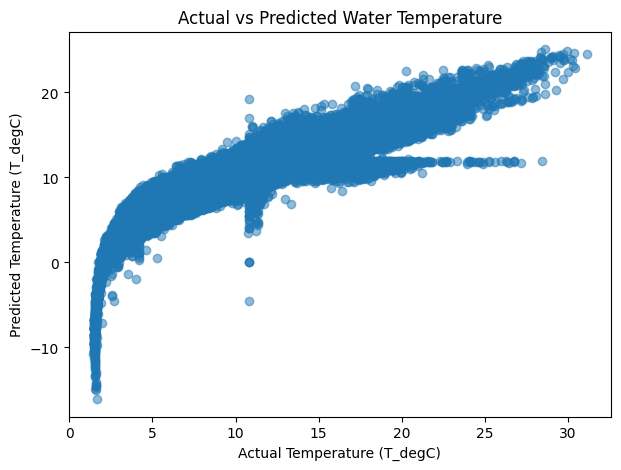

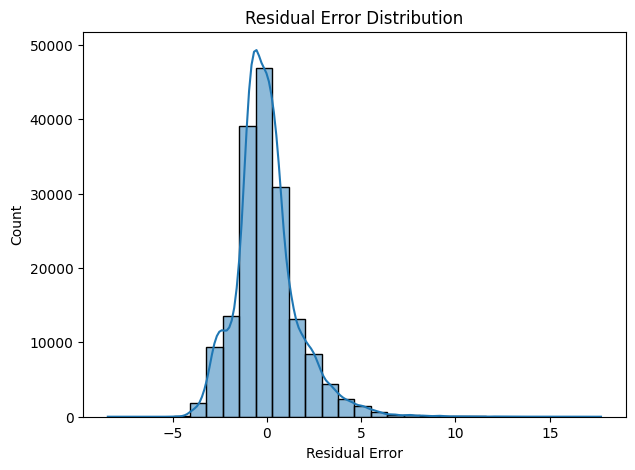


===== Ridge Regression =====
RMSE: 1.6813574649572023
R² Score: 0.8406359940254531

===== Lasso Regression =====
RMSE: 1.6838267943142005
R² Score: 0.8401675496877705


In [4]:
print("Anusri T-24BAD010")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"/kaggle/input/calcofi/bottle.csv", low_memory=False)

features = ['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat']
target = 'T_degC'

data = df[features + [target]]
data = data.fillna(data.mean())


X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===== Linear Regression Performance =====")
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temperature (T_degC)")
plt.ylabel("Predicted Temperature (T_degC)")
plt.title("Actual vs Predicted Water Temperature")
plt.show()
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual Error")
plt.title("Residual Error Distribution")
plt.show()

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("\n===== Ridge Regression =====")
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("R² Score:", r2_score(y_test, ridge_pred))

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("\n===== Lasso Regression =====")
print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("R² Score:", r2_score(y_test, lasso_pred))



Anusri T-24BAD010
Accuracy : 0.8
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


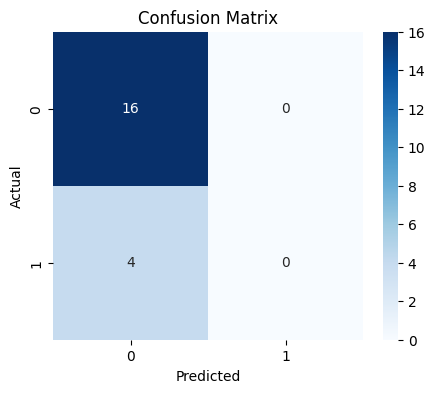

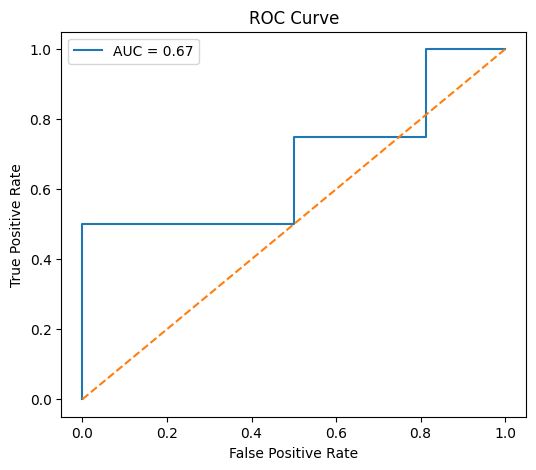

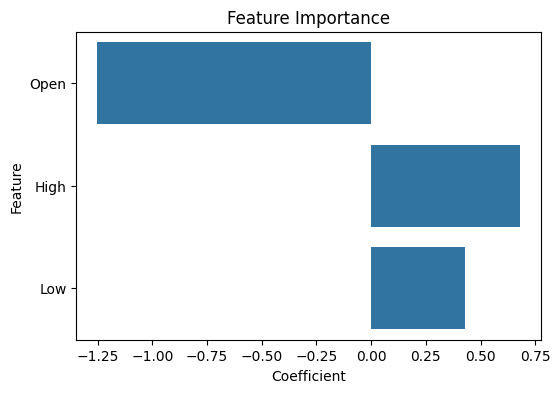

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized F1 Score: 0.75


In [1]:
print("Anusri T-24BAD010")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)
df = pd.read_csv(r"/kaggle/input/lic-stock-price-data/LICI - Daily data.csv")
df['Price_Movement'] = np.where(df['Close'] > df['Open'], 1, 0)
features = ['Open', 'High', 'Low']
target = 'Price_Movement'
X = df[features]
y = df[target]
X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_model.coef_[0]
})
plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title("Feature Importance")
plt.show()
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='f1'
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Optimized F1 Score:", f1_score(y_test, best_pred))